<a href="https://colab.research.google.com/github/gansuhmgl/hello-world/blob/master/SS2021_seminar_3a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt

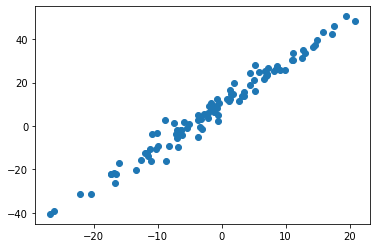

In [222]:
X = torch.randn(100, 1)*10
y = 2 * X + 3 * torch.randn(100, 1) + 10 
plt.plot(X.numpy(), y.numpy(), 'o')

In [238]:
class LinearRegress(nn.Module): 
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1, 1)
    
  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

  def get_loss(self, y_pred, y):
    S = (y_pred - y).pow(2).sum() / len(y_pred)
    return S
      
  def get_params(self):
    [w, b] = model.parameters()
    return w.item(), b.item()

  def plot_model(self, x, y):
    w, b = self.get_params()
    plt.scatter(x, y)
    x_1 = np.array([-30,30])
    y_1 = w*x_1 + b
    plt.plot(x_1, y_1, 'r')
    plt.show()

    

In [250]:
model = LinearRegress()
model
#[w, b] = model.parameters()
#print(w.item(), b.item())

LinearRegress(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

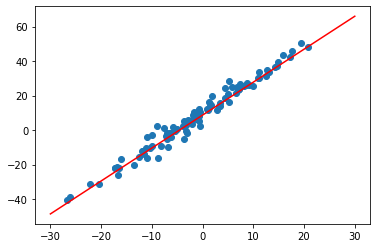

tensor([[ 10.9318],
        [ 20.8087],
        [-20.4825],
        [  8.4971],
        [-12.5742]])
tensor([[ 29.5807],
        [ 48.4471],
        [-30.4252],
        [ 24.9302],
        [-15.3192]], grad_fn=<SliceBackward>)


In [243]:
model.plot_model(X, y)
y_pred = model.forward(X)
print(X[:5])
print(y_pred[:5])

0 252.4252471923828


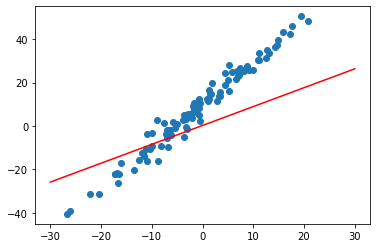

100 75.1741714477539


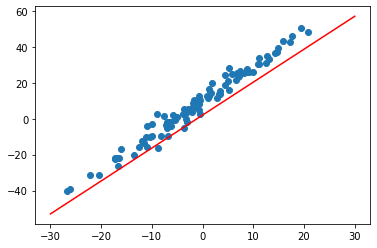

200 53.86654281616211


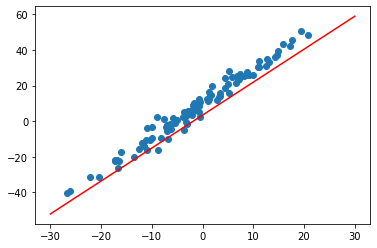

300 39.512229919433594


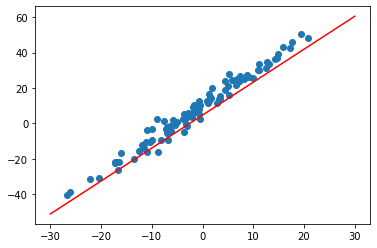

400 29.8421630859375


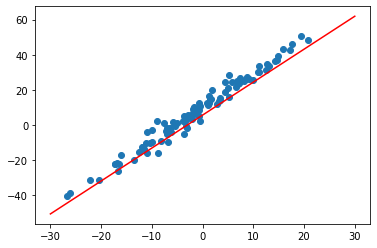

500 23.32770538330078


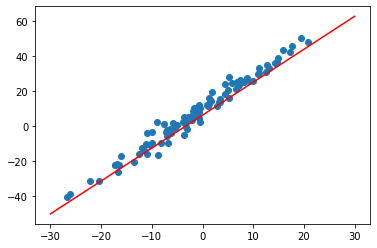

600 18.939132690429688


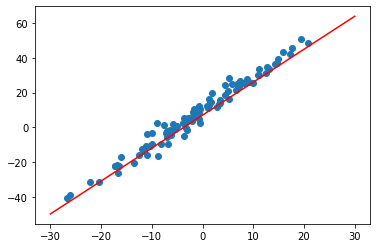

700 15.982654571533203


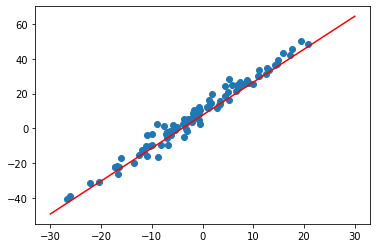

800 13.990970611572266


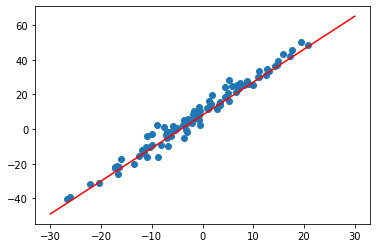

900 12.6492338180542


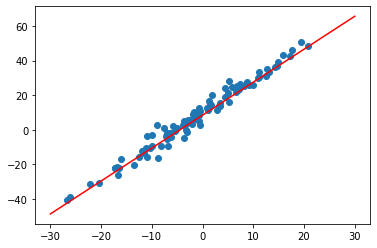

In [251]:
# # Загвараа сургая

optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

epoch = 1000
losses = list()

for i in range(epoch):
   
  y_pred = model.forward(X)
  S = model.get_loss(y_pred, y)
  optimizer.zero_grad() 
  S.backward()            
  optimizer.step()  

  losses.append(S.item())
 
  if i % 100 == 0:
    print(i, S.item())
    model.plot_model(X, y)

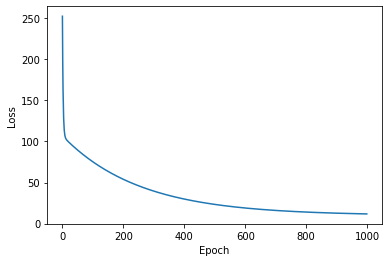

In [252]:
model.get_params()
plt.plot(range(epoch),losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()